In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\nitin\Desktop\controlone\Telco-Customer-Churn.csv")

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Split the dataset into features (X) and target variable (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Create transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy="mean")  # You can choose a different strategy if needed
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Display the processed data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [4]:
# Convert the preprocessed data to pandas dataframe
X_train_processed = pd.DataFrame(X_train_processed.todense())
X_test_processed = pd.DataFrame(X_test_processed.todense())
X_train_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,10968,10969,10970,10971,10972,10973,10974,10975,10976,10977
0,0.0,21.0,64.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,54.0,97.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,23.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,70.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,61.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Encode outputs to binary format
y_train = y_train.apply(lambda x: 0 if x=='No' else 1)
y_test = y_test.apply(lambda x: 0 if x=='No' else 1)

y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

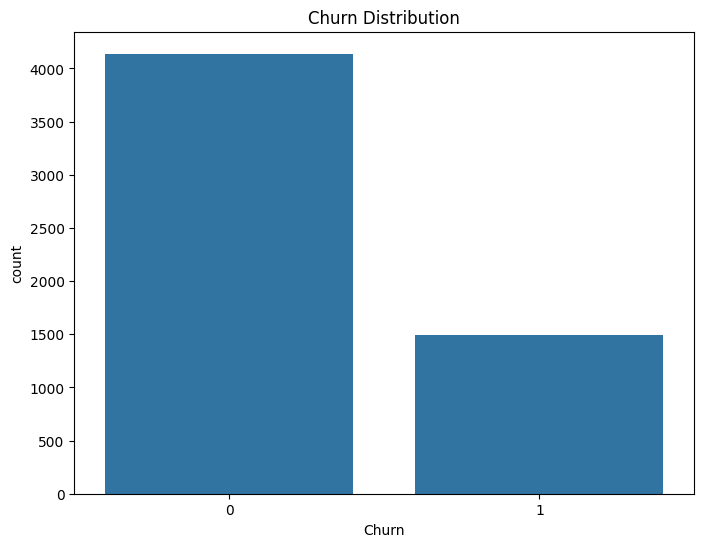

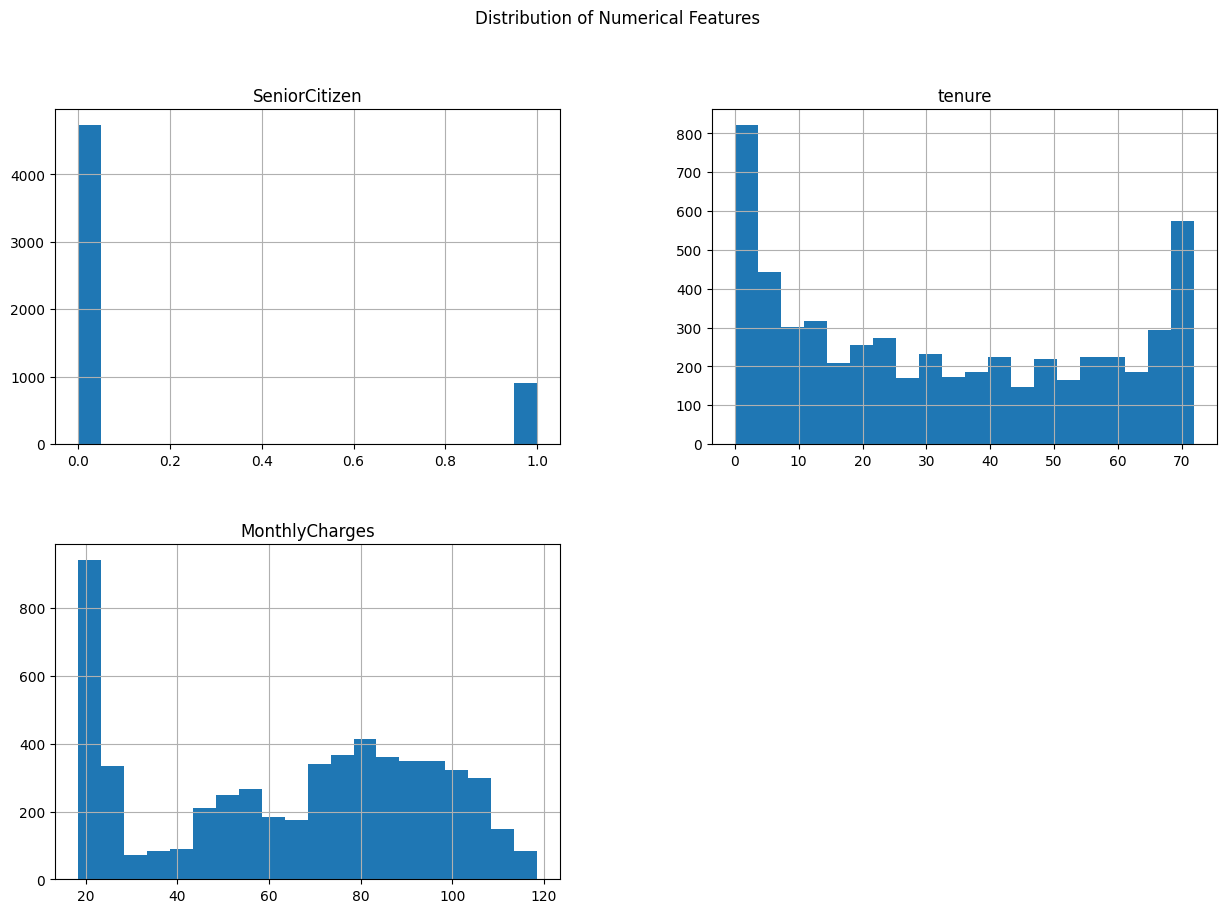

KeyboardInterrupt: 

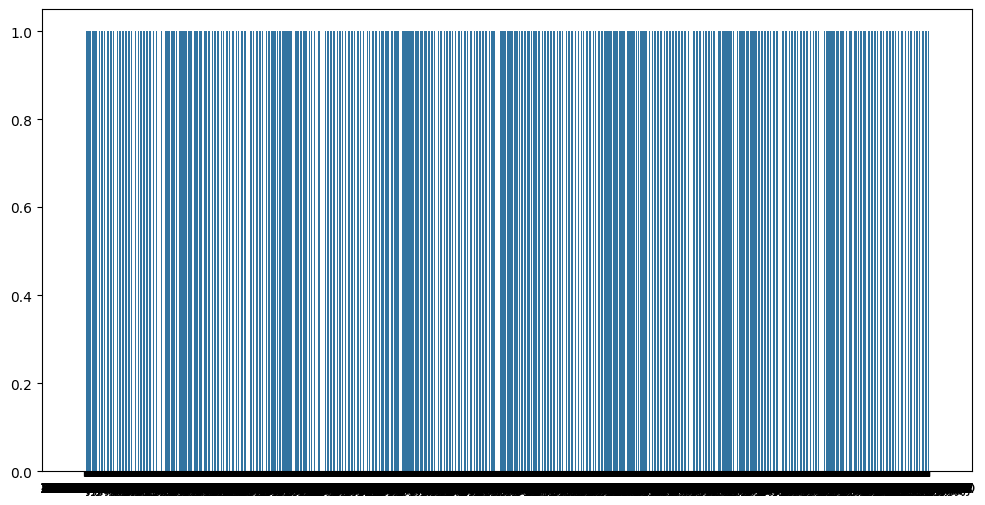

In [6]:
# Concatenate the training features and target variable for EDA
eda_df = pd.concat([X_train, y_train], axis=1)

# Univariate Analysis: Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Churn", data=eda_df)
plt.title("Churn Distribution")
plt.show()

# Univariate Analysis: Numerical Features
eda_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Bivariate Analysis: Churn vs. Categorical Features
for cat_col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=cat_col, hue="Churn", data=eda_df)
    plt.title(f"Churn Distribution Across {cat_col}")
    plt.show()

# Bivariate Analysis: Correlation Matrix
correlation_matrix = eda_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the neural network model
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, input_dim=X_train_processed.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam()

# Compile the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                351328    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 351,873
Trainable params: 351,873
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train_processed, y_train, epochs=25, batch_size=256, validation_data=(X_test_processed, y_test))

Epoch 1/25
23/23 [==============================] - 2s 50ms/step - loss: 0.6261 - accuracy: 0.6661 - val_loss: 0.5094 - val_accuracy: 0.7353
Epoch 2/25
23/23 [==============================] - 1s 39ms/step - loss: 0.5328 - accuracy: 0.7389 - val_loss: 0.4559 - val_accuracy: 0.7935
Epoch 3/25
23/23 [==============================] - 1s 33ms/step - loss: 0.5025 - accuracy: 0.7584 - val_loss: 0.4301 - val_accuracy: 0.8020
Epoch 4/25
23/23 [==============================] - 1s 30ms/step - loss: 0.5052 - accuracy: 0.7559 - val_loss: 0.4357 - val_accuracy: 0.8027
Epoch 5/25
23/23 [==============================] - 1s 28ms/step - loss: 0.4788 - accuracy: 0.7741 - val_loss: 0.4232 - val_accuracy: 0.7977
Epoch 6/25
23/23 [==============================] - 1s 31ms/step - loss: 0.4749 - accuracy: 0.7799 - val_loss: 0.4132 - val_accuracy: 0.8126
Epoch 7/25
23/23 [==============================] - 1s 29ms/step - loss: 0.4629 - accuracy: 0.7790 - val_loss: 0.4197 - val_accuracy: 0.8027
Epoch 8/25
23

In [9]:
# Make predictions on the test set
y_pred_nn = (model.predict(X_test_processed) > 0.5).astype("int32")

# Evaluate the neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, pos_label=1)
recall_nn = recall_score(y_test, y_pred_nn, pos_label=1)
f1_nn = f1_score(y_test, y_pred_nn, pos_label=1)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

# Print evaluation metrics for the neural network model
print(f"Neural Network Model - Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1 Score: {f1_nn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_nn)
print("Classification Report:")
print(class_report_nn)

45/45 [==============================] - 0s 4ms/step
Neural Network Model - Accuracy: 0.8169, Precision: 0.6737, Recall: 0.5979, F1 Score: 0.6335
Confusion Matrix:
[[928 108]
 [150 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.60      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



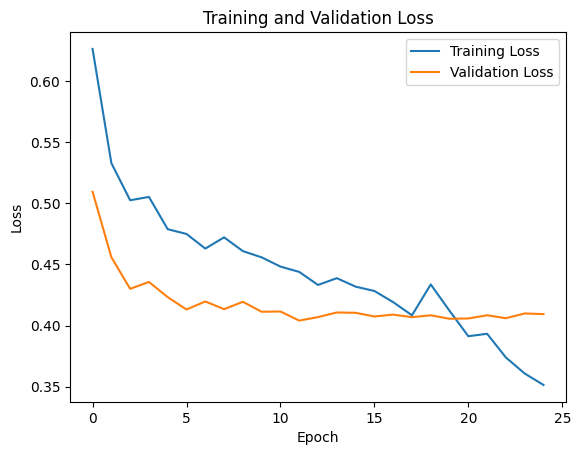

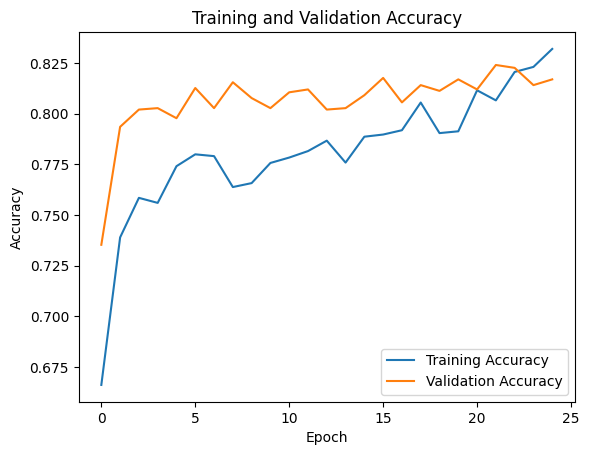

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Save the trained model to file
model.save('./DLModels/model01.keras')

In [14]:
modelLoadTest= tf.keras.models.load_model('./DLModels/model01.keras')
modelLoadTest.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                351328    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 351,873
Trainable params: 351,873
Non-trainable params: 0
_________________________________________________________________
